# WQI Prediction using SVR

## Importing libraries

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import mean_squared_error

## data collection

In [92]:
data = pd.read_csv('C:/Users/Global/Downloads/water_dataX.csv',encoding="ISO-8859-1")
data.head()

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203,NAN,0.1,11,27,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189,2,0.2,4953,8391,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179,1.7,0.1,3243,5330,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64,3.8,0.5,5382,8443,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83,1.9,0.4,3428,5500,2014


In [93]:
data['year'].max()

2014

In [94]:
data.shape

(1991, 12)

In [95]:
data.dtypes

STATION CODE                        object
LOCATIONS                           object
STATE                               object
Temp                                object
D.O. (mg/l)                         object
PH                                  object
CONDUCTIVITY (µmhos/cm)             object
B.O.D. (mg/l)                       object
NITRATENAN N+ NITRITENANN (mg/l)    object
FECAL COLIFORM (MPN/100ml)          object
TOTAL COLIFORM (MPN/100ml)Mean      object
year                                 int64
dtype: object

In [96]:
data.isnull().sum()

STATION CODE                        0
LOCATIONS                           0
STATE                               0
Temp                                0
D.O. (mg/l)                         0
PH                                  0
CONDUCTIVITY (µmhos/cm)             0
B.O.D. (mg/l)                       0
NITRATENAN N+ NITRITENANN (mg/l)    0
FECAL COLIFORM (MPN/100ml)          0
TOTAL COLIFORM (MPN/100ml)Mean      0
year                                0
dtype: int64

In [97]:
#conversions
data['Temp']=pd.to_numeric(data['Temp'],errors='coerce')
data['D.O. (mg/l)']=pd.to_numeric(data['D.O. (mg/l)'],errors='coerce')
data['PH']=pd.to_numeric(data['PH'],errors='coerce')
data['B.O.D. (mg/l)']=pd.to_numeric(data['B.O.D. (mg/l)'],errors='coerce')
data['CONDUCTIVITY (µmhos/cm)']=pd.to_numeric(data['CONDUCTIVITY (µmhos/cm)'],errors='coerce')
data['NITRATENAN N+ NITRITENANN (mg/l)']=pd.to_numeric(data['NITRATENAN N+ NITRITENANN (mg/l)'],errors='coerce')
data['TOTAL COLIFORM (MPN/100ml)Mean']=pd.to_numeric(data['TOTAL COLIFORM (MPN/100ml)Mean'],errors='coerce')
data.dtypes

STATION CODE                         object
LOCATIONS                            object
STATE                                object
Temp                                float64
D.O. (mg/l)                         float64
PH                                  float64
CONDUCTIVITY (µmhos/cm)             float64
B.O.D. (mg/l)                       float64
NITRATENAN N+ NITRITENANN (mg/l)    float64
FECAL COLIFORM (MPN/100ml)           object
TOTAL COLIFORM (MPN/100ml)Mean      float64
year                                  int64
dtype: object

In [98]:
#initialization

start=2
end=1779

station=data.iloc [start:end ,0]
location=data.iloc [start:end ,1]
state=data.iloc [start:end ,2]
do= data.iloc [start:end ,4].astype(np.float64)
value=0
ph = data.iloc[ start:end,5]  
co = data.iloc [start:end ,6].astype(np.float64)   
  
year=data.iloc[start:end,11]
tc=data.iloc [2:end ,10].astype(np.float64)

bod = data.iloc [start:end ,7].astype(np.float64)
na= data.iloc [start:end ,8].astype(np.float64)


In [99]:
data.isnull().sum()

STATION CODE                          0
LOCATIONS                             0
STATE                                 0
Temp                                 92
D.O. (mg/l)                          31
PH                                    8
CONDUCTIVITY (µmhos/cm)              25
B.O.D. (mg/l)                        43
NITRATENAN N+ NITRITENANN (mg/l)    225
FECAL COLIFORM (MPN/100ml)            0
TOTAL COLIFORM (MPN/100ml)Mean      132
year                                  0
dtype: int64

In [100]:
data.head()

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203.0,NaN,0.1,11,27.0,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.0,0.2,4953,8391.0,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.7,0.1,3243,5330.0,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.8,0.5,5382,8443.0,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.9,0.4,3428,5500.0,2014


In [101]:
data=pd.concat([station,location,state,do,ph,co,bod,na,tc,year],axis=1)
data.columns = ['station','location','state','do','ph','co','bod','na','tc','year']

## WQI Calculation

In [102]:
#calulation of Ph
data['npH']=data.ph.apply(lambda x: (100 if (8.5>=x>=7)  
                                 else(80 if  (8.6>=x>=8.5) or (6.9>=x>=6.8) 
                                      else(60 if (8.8>=x>=8.6) or (6.8>=x>=6.7) 
                                          else(40 if (9>=x>=8.8) or (6.7>=x>=6.5)
                                              else 0)))))

In [103]:
#calculation of dissolved oxygen
data['ndo']=data.do.apply(lambda x:(100 if (x>=6)  
                                 else(80 if  (6>=x>=5.1) 
                                      else(60 if (5>=x>=4.1)
                                          else(40 if (4>=x>=3) 
                                              else 0)))))

In [104]:
#calculation of total coliform
data['nco']=data.tc.apply(lambda x:(100 if (5>=x>=0)  
                                 else(80 if  (50>=x>=5) 
                                      else(60 if (500>=x>=50)
                                          else(40 if (10000>=x>=500) 
                                              else 0)))))

In [105]:
#calc of B.D.O
data['nbdo']=data.bod.apply(lambda x:(100 if (3>=x>=0)  
                                 else(80 if  (6>=x>=3) 
                                      else(60 if (80>=x>=6)
                                          else(40 if (125>=x>=80) 
                                              else 0)))))

In [106]:
#calculation of electrical conductivity
data['nec']=data.co.apply(lambda x:(100 if (75>=x>=0)  
                                 else(80 if  (150>=x>=75) 
                                      else(60 if (225>=x>=150)
                                          else(40 if (300>=x>=225) 
                                              else 0)))))

In [107]:
#Calulation of nitrate
data['nna']=data.na.apply(lambda x:(100 if (20>=x>=0)  
                                 else(80 if  (50>=x>=20) 
                                      else(60 if (100>=x>=50)
                                          else(40 if (200>=x>=100) 
                                              else 0)))))


In [108]:
data['wph']=data.npH * 0.165
data['wdo']=data.ndo * 0.281
data['wbdo']=data.nbdo * 0.234
data['wec']=data.nec* 0.009
data['wna']=data.nna * 0.028
data['wco']=data.nco * 0.281
data['wqi']=data.wph+data.wdo+data.wbdo+data.wec+data.wna+data.wco 
data.head()

,station,location,state,do,ph,co,bod,na,tc,year,...,nbdo,nec,nna,wph,wdo,wbdo,wec,wna,wco,wqi
2,1475,ZUARI AT PANCHAWADI,GOA,6.3,6.9,179.0,1.7,0.1,5330.0,2014,...,100,60,100,13.2,28.10,23.40,0.54,2.8,11.24,79.28
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,5.8,6.9,64.0,3.8,0.5,8443.0,2014,...,80,100,100,13.2,22.48,18.72,0.90,2.8,11.24,69.34
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,5.8,7.3,83.0,1.9,0.4,5500.0,2014,...,100,80,100,16.5,22.48,23.40,0.72,2.8,11.24,77.14
5,1400,"MANDOVI AT NEGHBOURHOOD OF PANAJI, GOA",GOA,5.5,7.4,81.0,1.5,0.1,4049.0,2014,...,100,80,100,16.5,22.48,23.40,0.72,2.8,11.24,77.14
6,1476,"MANDOVI AT TONCA, MARCELA, GOA",GOA,6.1,6.7,308.0,1.4,0.3,5672.0,2014,...,100,0,100,9.9,28.10,23.40,0.00,2.8,11.24,75.44


In [109]:
#calculation overall wqi for each year
wqi_year=data.groupby('year')['wqi'].mean()

In [110]:
wqi_year

year
2006    71.308824
2007    72.549000
2008    72.570943
2009    74.085193
2010    74.648723
2011    75.647013
2012    78.969041
2013    75.009425
2014    76.879588
Name: wqi, dtype: float64

## Feature comparision

C:\Users\Global\AppData\Local\Temp/ipykernel_8272/2560433513.py:10: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


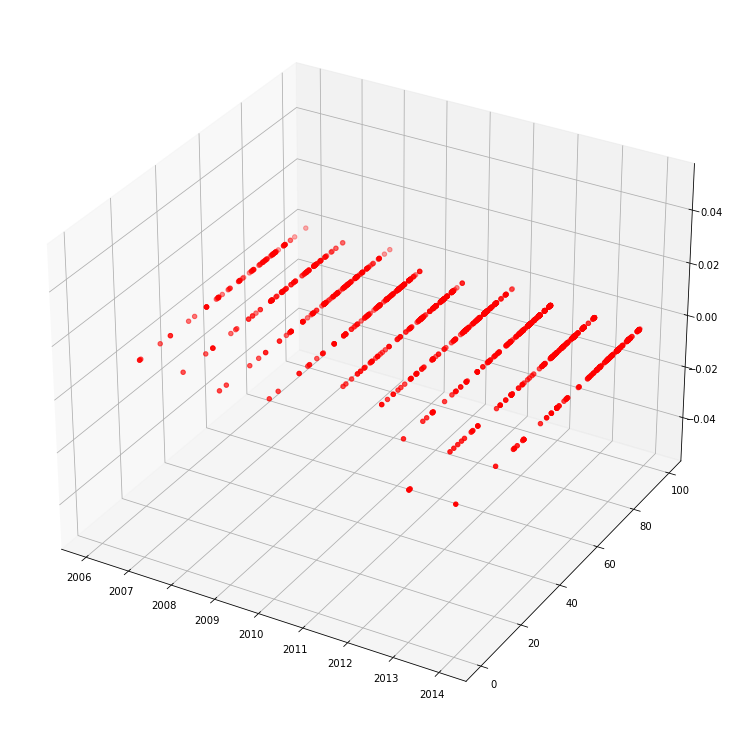

year
2006    71.308824
2007    72.549000
2008    72.570943
2009    74.085193
2010    74.648723
2011    75.647013
2012    78.969041
2013    75.009425
2014    76.879588
Name: wqi, dtype: float64

In [111]:
year=data['year'].values
AQI=data['wqi'].values
data['wqi']=pd.to_numeric(data['wqi'],errors='coerce')
data['year']=pd.to_numeric(data['year'],errors='coerce')


plt.rcParams['figure.figsize'] = (20.0, 10.0)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(year,AQI, color='red')
plt.show()
ag

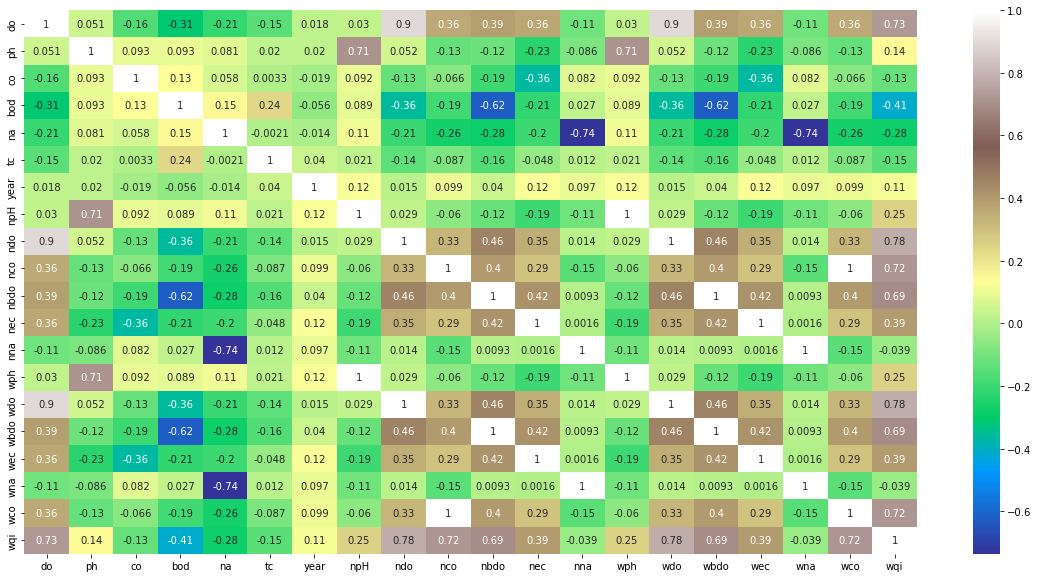

In [112]:

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(data.corr(), annot=True, cmap='terrain')
plt.show()

In [113]:
data.corr()

,do,ph,co,bod,na,tc,year,npH,ndo,nco,nbdo,nec,nna,wph,wdo,wbdo,wec,wna,wco,wqi
do,1.000000,0.050515,-0.161836,-0.314031,-0.209173,-0.152184,0.017725,0.030215,0.895398,0.358973,0.389273,0.364089,-0.110453,0.030215,0.895398,0.389273,0.364089,-0.110453,0.358973,0.725644
ph,0.050515,1.000000,0.093495,0.092623,0.080630,0.019849,0.020391,0.710674,0.051927,-0.127880,-0.116440,-0.229188,-0.086311,0.710674,0.051927,-0.116440,-0.229188,-0.086311,-0.127880,0.141974
co,-0.161836,0.093495,1.000000,0.130344,0.058201,0.003319,-0.018873,0.092489,-0.128125,-0.066366,-0.194745,-0.363019,0.082389,0.092489,-0.128125,-0.194745,-0.363019,0.082389,-0.066366,-0.128976
bod,-0.314031,0.092623,0.130344,1.000000,0.150877,0.239510,-0.056117,0.089097,-0.356888,-0.188547,-0.621388,-0.214733,0.026787,0.089097,-0.356888,-0.621388,-0.214733,0.026787,-0.188547,-0.412820
na,-0.209173,0.080630,0.058201,0.150877,1.000000,-0.002067,-0.014178,0.107847,-0.205007,-0.261196,-0.280057,-0.195571,-0.735543,0.107847,-0.205007,-0.280057,-0.195571,-0.735543,-0.261196,-0.280464
tc,-0.152184,0.019849,0.003319,0.239510,-0.002067,1.000000,0.039549,0.020822,-0.141069,-0.086619,-0.163186,-0.047796,0.012456,0.020822,-0.141069,-0.163186,-0.047796,0.012456,-0.086619,-0.150709
year,0.017725,0.020391,-0.018873,-0.056117,-0.014178,0.039549,1.000000,0.123356,0.014595,0.099401,0.040337,0.119412,0.097106,0.123356,0.014595,0.040337,0.119412,0.097106,0.099401,0.112595
npH,0.030215,0.710674,0.092489,0.089097,0.107847,0.020822,0.123356,1.000000,0.029130,-0.060056,-0.121937,-0.194893,-0.107124,1.000000,0.029130,-0.121937,-0.194893,-0.107124,-0.060056,0.249768
ndo,0.895398,0.051927,-0.128125,-0.356888,-0.205007,-0.141069,0.014595,0.029130,1.000000,0.328676,0.460979,0.345351,0.013642,0.029130,1.000000,0.460979,0.345351,0.013642,0.328676,0.777720
nco,0.358973,-0.127880,-0.066366,-0.188547,-0.261196,-0.086619,0.099401,-0.060056,0.328676,1.000000,0.399469,0.291050,-0.150128,-0.060056,0.328676,0.399469,0.291050,-0.150128,1.000000,0.721259


X = data.iloc[:,4:10]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

## feature selection

In [114]:
X = data[['wph','wdo','wbdo','wec','wna','wco']]
Y= data['wqi']

## feature scaling

In [115]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X = sc.fit_transform(X)


## SVR Model

In [116]:

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.2, random_state=50,shuffle=True)

In [117]:
from sklearn.svm import SVR
# most important SVR parameter is Kernel type. It can be #linear,polynomial or gaussian SVR. We have a non-linear condition 
#so we can select polynomial or gaussian but here we select RBF(a #gaussian type) kernel.
regressor = SVR(kernel='poly',C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)
regressor.fit(X_train,Y_train)


# Hyper parameter tuning


#coef0 float, default=0.0
#Independent term in kernel function. It is only significant in ‘poly’ and ‘sigmoid’.

#gamma{‘scale’, ‘auto’} or float, default=’scale’
#Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
#if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,
#if ‘auto’, uses 1 / n_features.

#degreeint, default=3
#Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.

#Cfloat, default=1.0
#Regularization parameter. The strength of the regularization is inversely proportional to C.
#Must be strictly positive. The penalty is a squared l2 penalty.

#epsilonfloat, default=0.1
#Epsilon in the epsilon-SVR model. It specifies the epsilon-tube within which 
#no penalty is associated in the training loss function with points predicted within a distance epsilon from the actual value.

SVR(C=100, coef0=1, gamma='auto', kernel='poly')

In [118]:
y_pred = regressor.predict(X_test)

In [119]:
y_pred

array([61.49150157, 73.0435514 , 37.95739147, 94.08023487, 61.49150157,
       67.08507695, 76.43006623, 88.46769648, 76.38314547, 50.2551525 ,
       78.32361007, 82.85035073, 70.72186649, 76.38314547, 82.33834153,
       88.46769648, 79.59130307, 83.02718515, 83.69852629, 64.48292269,
       88.30049582, 88.30049582, 63.44163591, 88.30049582, 67.01599783,
       73.02229541, 77.79359541, 89.31985445, 76.13476553, 79.59130307,
       79.59130307, 71.07144192, 66.40916099, 83.52859544, 82.33834153,
       61.54856882, 94.77433163, 61.49150157, 55.82054835, 78.32361007,
       82.33834153, 89.15353542, 82.00389239, 34.09723584, 83.35987623,
       55.80647503, 71.68145524, 88.46769648, 91.11729821, 88.30049582,
       82.5079113 , 30.07734797, 76.31409681, 88.46769648, 67.42604496,
       84.37414798, 81.96030661, 82.67867373, 88.46769648, 82.67867373,
       83.69852629, 84.37414798, 43.53293547, 82.85035073, 86.56271789,
       71.24935958, 44.90073182, 70.72186649, 81.09049063, 83.69

## Regression metrics

In [120]:
regressor.score(X_test,Y_test) # r2 value

0.9999764071619022

In [121]:
#rmse
mean_squared_error(Y_test,y_pred, squared=False)

0.07277168504633746

In [122]:
#mse
mean_squared_error(Y_test,y_pred)

0.005295718144483336

## WQI analysis 

In [123]:
#calc of wqi quality
data['wqi_quality']=data['wqi'].apply(lambda x:('excellent' if (25>=x>=0)  
                                                else('good' if  (50>=x>=26) 
                                                     else('moderate' if (75>=x>=51)
                                                          else('poor' if (100>=x>=76) 
                                                               else 'very poor')))))

0 - excellent
1 - good
2 - moderate
3 - poor
4 - very poor

In [124]:
data['wqi_quality'].value_counts()

poor         1123
moderate      467
good          108
very poor      62
excellent      17
Name: wqi_quality, dtype: int64

## Summary

### Evaluation metrics 
1. R square value - 0.999976
2. RMSE value - 0.07277
3. MSE value - 0.00529

### Water Quality Index classification counts

1. poor - 1123
2. moderate - 467
3. good - 108
4. very poor - 62
5. excellent - 17

***
By : Sai Sharanya Y

***